In [1]:
from PIL import Image
from pytesseract import pytesseract
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import entropy
import glob

In [2]:
# path = r'D:\projects\xray_LT\letters.png'
path = r'D:\projects\xray_LT\IMG-7113.jpg'

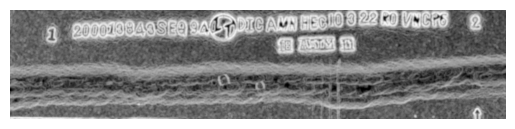

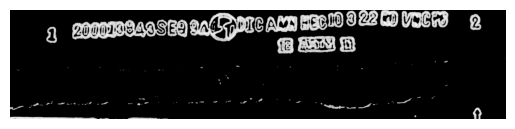

In [4]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

image = cv2.imread(path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ent_img = entropy(gray, disk(10))
plt.imshow(ent_img, 'gray');
plt.gca().axis('off')
plt.show()

entropy_max = np.max(ent_img)
ent_norm = ent_img/entropy_max

ent_new =np.where(ent_norm<0.7, 0, ent_norm)
ent_normd = (ent_new*255).astype('uint8')

plt.imshow(ent_new, 'gray');
plt.gca().axis('off')
plt.show()

D:\projects\xray_LT\astm.jpg
1B ASTM



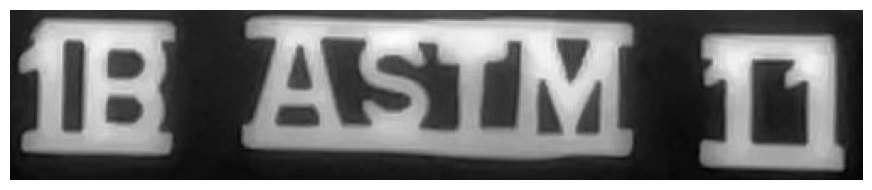

In [31]:
%reset -f
from PIL import Image
from pytesseract import pytesseract
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from skimage.filters.rank import entropy
from skimage.morphology import disk
import glob

filenames = glob.glob(r'D:\projects\xray_LT\astm.jpg')

#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

for file in filenames: 
    print(file)
    
    image = cv2.imread(file,0)
#     cont_img = image.copy()
    cont_img = np.zeros(image.shape)
    ent_img = entropy(image, disk(5))
    entropy_max = np.max(ent_img)
    ent_norm = ent_img/entropy_max
    plt.figure(figsize=(11,6))
    ent_new =np.where(ent_norm<0.7, 0, 1)
    ent_normd = (ent_new*255).astype('uint8')
    contours, hierarchy = cv2.findContours(ent_normd, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cont in contours:
        x,y,w,h = cv2.boundingRect(cont)
        if w*h > 500:
            cv2.rectangle(cont_img, (x,y), (x+w,y+h), (255, 255, 255), 5)
            cv2.drawContours(cont_img,cont,-1,(255,255,255),5)
    blah = image
    text = pytesseract.image_to_string(blah)
    print(text)
    plt.imshow(blah, 'gray');
    plt.gca().axis('off')
    plt.show()

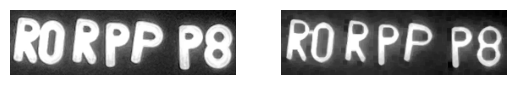

In [44]:
path = r'D:\projects\xray_LT\letters2.png'
img = cv2.imread(path,0)
kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=2)
fig = plt.figure()
plt.subplot(121)
plt.imshow(img,'gray')
plt.subplot(122)
plt.imshow(img_erosion,'gray')

for ax in fig.axes: 
    ax.axis('off')

RORPP P8



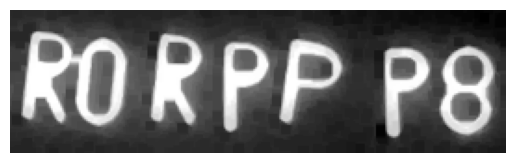

In [66]:
path = r'D:\projects\xray_LT\letters2.png'
# path = r'D:\projects\xray_LT\letters.png'

#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Define path to image
path_to_image = path

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

img = cv2.imread(path,0)

kernel = np.ones((3,3), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=2)


blah = img_erosion
#Extract text from image
text = pytesseract.image_to_string(blah)

print(text)
plt.imshow(blah,'gray'); plt.gca().axis('off'); plt.show()